## Занятие 4
## Алгебра
## Фундаментальная система решений однородной СЛАУ

https://docs.sympy.org/latest/modules

In [4]:
from sympy import linsolve, Matrix, S, Symbol, symbols, Eq, linear_eq_to_matrix, simplify, zeros

### Задание 1.
Проверить по теореме Кронекера-Капелли совместность СЛАУ $AX = b$, если
\begin{align*}
a)\ A = \left(
\begin{matrix}
-1 & -3 & 5 & 2\\
2 & -1 & 4 & 7\\
3 & 4 & -1 & 0\\
5 & 0 & 1 & -3
\end{matrix}
\right), \quad 
b = \left(
\begin{matrix}
14\\ 56\\ 5\\ -6
\end{matrix}
\right), \quad 
b)\ A = \left(
\begin{matrix}
1 & 3 & 5 & 2\\
2 & -1 & 4 & 1\\
3 & 4 & -1 & 0\\
5 & 3 & 3 & 1
\end{matrix}
\right), \quad 
b = \left(
\begin{matrix}
24\\ 20\\ 5\\ 5
\end{matrix}
\right), \\
c)\ A = \left(
\begin{matrix}
1 & 3 & 5 & 2\\
2 & -1 & 4 & 1\\
3 & 2 & 9 & 3\\
1 & -4 & -1 & -1
\end{matrix}
\right), \quad 
b = \left(
\begin{matrix}
24\\ 20\\ 44\\ -4
\end{matrix}
\right)
\end{align*}

In [31]:
# пункт а)
A = Matrix([[-1, -3, 5, 2],
            [2, -1, 4, 7],
            [3, 4, -1, 0], 
            [5, 0, 1, -3]])
b = Matrix([14, 56, 5, -6])
A_b1 = A.row_join(b)
print(f"пункт a) {A.rank() == A_b1.rank()}")

# пункт б)
A = Matrix([[1, 3, 5, 2],
            [2, -1, 4, 1],
            [3, 4, -1, 0], 
            [5, 3, 3, 1]])
b = Matrix([24, 20, 5, 5])
A_b2 = A.row_join(b)
print(f"пункт b) {A.rank() == A_b2.rank()}")

# пункт c)
A = Matrix([[1, 3, 5, 2],
            [2, -1, 4, 1],
            [3, 2, 9, 3], 
            [1, -4, -1, -1]])
b = Matrix([24, 20, 44, -4])
A_b3 = A.row_join(b)
print(f"пункт c) {A.rank() == A_b3.rank()}")

пункт a) True
пункт b) False
пункт c) True


### Задание 2.
Проверить единственность решения в совместных СЛАУ Задания 1.

In [39]:
# есть смысл проверить только пункты а) и c), поскольку в пункте b) СЛАУ несовместна
for B in [A_b1, A_b3]:
    rgA = B[:, :-1].rank()
    n, m = B[:, :-1].shape # m - число столбцов, m равно числу переменных (притом n = кол-во строк)
    if rgA == B.rank() and rgA == m:
        print(f'rg(A) = rg(Ab) = m = {rgA}')
        print(f'Singular solve for matrix:')
    else:
        print(f'rg(A) = rg(Ab) != m = {rgA}')
        print("Infinity solves in matrix:")
    display(B)
    print()

rg(A) = rg(Ab) = m = 4
Singular solve for matrix:


Matrix([
[-1, -3,  5,  2, 14],
[ 2, -1,  4,  7, 56],
[ 3,  4, -1,  0,  5],
[ 5,  0,  1, -3, -6]])


rg(A) = rg(Ab) != m = 2
Infinity solves in matrix:


Matrix([
[1,  3,  5,  2, 24],
[2, -1,  4,  1, 20],
[3,  2,  9,  3, 44],
[1, -4, -1, -1, -4]])

### Задание 3
Для однородных СЛАУ, соответствующих СЛАУ из Задания 1 установить, есть ли у однородной СЛАУ нетривиальное решение. 

In [7]:
# пункт а)
A_od1 = Matrix([[-1, -3, 5, 2],
            [2, -1, 4, 7],
            [3, 4, -1, 0], 
            [5, 0, 1, -3]])

# пункт б)
A_od2 = Matrix([[1, 3, 5, 2],
            [2, -1, 4, 1],
            [3, 4, -1, 0], 
            [5, 3, 3, 1]])

# пункт c)
A_od3 = Matrix([[1, 3, 5, 2],
            [2, -1, 4, 1],
            [3, 2, 9, 3], 
            [1, -4, -1, -1]])

number = ['a', 'b', 'c']
for i, A in enumerate([A_od1, A_od2, A_od3]):
    if A.rank() < A.shape[1]:
        print(number[i])
        display(A)

b


Matrix([
[1,  3,  5, 2],
[2, -1,  4, 1],
[3,  4, -1, 0],
[5,  3,  3, 1]])

c


Matrix([
[1,  3,  5,  2],
[2, -1,  4,  1],
[3,  2,  9,  3],
[1, -4, -1, -1]])

### Задание 4
Для однородных СЛАУ из Задания 3, имеющих нетривиальное решение, составить ФСР. 

In [33]:
number = ['b', 'c']
for i, Matrix_FSR in enumerate([A_od2, A_od3]):
    print(f'Rg {number[i]} = {Matrix_FSR.rank()}, {Matrix_FSR.shape[1]} переменных, {Matrix_FSR.shape[0]} ФСР:')
    display(*Matrix_FSR.nullspace())
    print()

Rg b = 3, 4 переменных, 4 ФСР:


Matrix([
[  7/82],
[ -6/41],
[-27/82],
[     1]])


Rg c = 2, 4 переменных, 4 ФСР:


Matrix([
[-17/7],
[ -6/7],
[    1],
[    0]])

Matrix([
[-5/7],
[-3/7],
[   0],
[   1]])

### Задание 5
Для однородных СЛАУ из Задания 4 построить общее решение, используя построенную в Задании 4 ФСР. Сравнить с результатом, возвращаемым linsolve. 

In [58]:
n, m = A_od2.shape
x = symbols(f'x1:{m + 1}') # создаём кортеж символов (x1, x2, x3, x4)
X = zeros(m, 1) # нулевой вектор длины m
for i, vect in enumerate(A_od2.nullspace()):
    X += vect * Symbol(f'alpha{i + 1}')
display(X, *linsolve((A_od2, zeros(n, 1)), x))

Matrix([
[  7*alpha1/82],
[ -6*alpha1/41],
[-27*alpha1/82],
[       alpha1]])

(7*x4/82, -6*x4/41, -27*x4/82, x4)

### Индивидуальное задание.
Дана СЛАУ $AX = b$. Проверить совместность по теореме Кронекера-Капелли. Если СЛАУ совместна, проверить единственность решения.
Для соответствующей однородной СЛАУ проверить существование нетривиального решения. В случае, если оно существует, 
найти размерность пространства решений и составить ФСР и общее решение однородной СЛАУ.

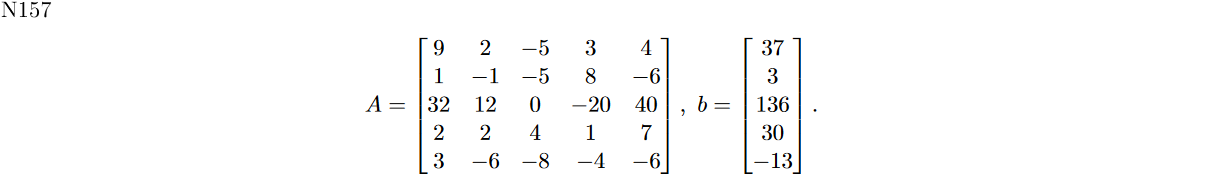

In [98]:
# Проверка совместимости матрицы
A = Matrix([[ 9,  2, -5,   3,  4],
            [ 1, -1, -5,   8, -6],
            [32, 12,  0, -20, 40], 
            [ 2,  2,  4,   1,  7],
            [ 3, -6, -8,  -4, -6]])
b = Matrix([37, 3, 136, 30, -13])
A_b = A.row_join(b)
print(f"Совместимость матрицы: {A.rank() == A_b.rank()}")
print()

# Проверка единственности решений
rgA = A_b[:, :-1].rank()
n, m = A_b[:, :-1].shape # m - число столбцов, m равно числу переменных (притом n = кол-во строк)
if rgA == B.rank() and rgA == m:
    print(f'rg(A) = rg(Ab) = m = {rgA}')
    print(f'СЛАУ имеет единственное решение')
else:
    print(f'rg(A) = rg(Ab) != m = {rgA}')
    print("СЛАУ имеет бесконечное количество решений")
print()

# Проверка для однородной СЛАУ существования нетривиального решения
A_od = Matrix([[ 9,  2, -5,   3,  4],
               [ 1, -1, -5,   8, -6],
               [32, 12,  0, -20, 40], 
               [ 2,  2,  4,   1,  7],
               [ 3, -6, -8,  -4, -6]])
if A_od.rank() < A_od.shape[1]:
    print("СЛАУ содержит нетривиальное решение, поскольку Rg A < n")
else:
    print("СЛАУ не содержит нетривиального решения, поскольку Rg A >= n")
print()

# Нахождение размерности пространства решений
print(f"Размерность подпространства решений n - r, где r — это Rg A, равна {A_od.shape[1] - A_od.rank()}")
print()

# Составление ФСР
print('ФСР однородной СЛАУ:')
display(*A_od.nullspace())
print()

# Составление общего решения
n, m = A_od.shape
x = symbols(f'x1:{m + 1}') # создаём кортеж символов (x1, x2, x3, x4)
X = zeros(m, 1) # нулевой вектор длины m
for i, vect in enumerate(A_od.nullspace()):
    X += vect * Symbol(f'x{i + 1}')
print("Общее решение однородной СЛАУ:")
display(X)

Совместимость матрицы: True

rg(A) = rg(Ab) != m = 4
СЛАУ имеет бесконечное количество решений

СЛАУ содержит нетривиальное решение, поскольку Rg A < n

Размерность подпространства решений n - r, где r — это Rg A, равна 1

ФСР однородной СЛАУ:


Matrix([
[-1924/1707],
[ -151/1707],
[-2011/1707],
[  245/1707],
[         1]])


Общее решение однородной СЛАУ:


Matrix([
[-1924*x1/1707],
[ -151*x1/1707],
[-2011*x1/1707],
[  245*x1/1707],
[           x1]])

Хорасанджян Левон, вариант №157